## Autocorrelation

* Autocorrelation reflects the degree of linear dependency between the time series at index t and the time series at indices t-h or t+h.
* A positive autocorrelation indicates that the present and future values of the time series move in the same direction, whereas negative values means that present and future values move in the opposite direction.
* If autocorrelation is close to zero, temporal dependencies within the series may be hard to find. Because of this property, autocorrelation is useful in predicting the future state of a time series at h time steps ahead.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
djia_df = pd.read_excel('Data/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [63]:
djia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null datetime64[ns]
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


* We have used the closing value of DJIA, which is given in column Close, to illustrate
autocorrelation and the ACF function. The time series plot has been generated as follows:

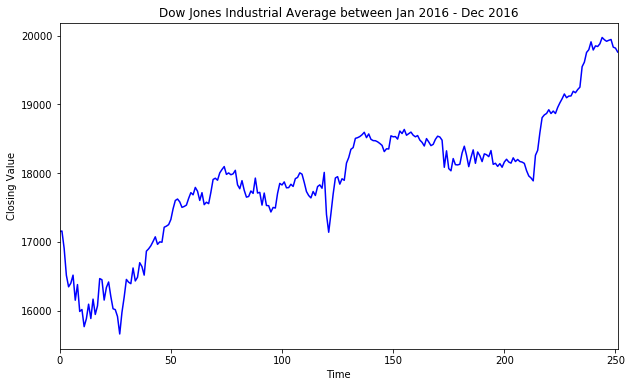

In [64]:
plt.figure(figsize=(10, 6))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value')
plt.show()

* Next, the ACF is estimated by computing autocorrelation for different values of lag h, which
in this case is varied from 0 through 30. The Pandas.Series.autocorr function is used to
calculate the autocorrelation for different values the lag. The code for this is given as
follows:

In [65]:
#### with for loop 
# lag = range(0,31)
#     djia_acf = []
# for l in lag:
# djia_acf.append(djia_df['Close'].autocorr(l))

In [66]:
# with list comprehension
djia_acf = [djia_df['Close'].autocorr(l) for l in range(31)]

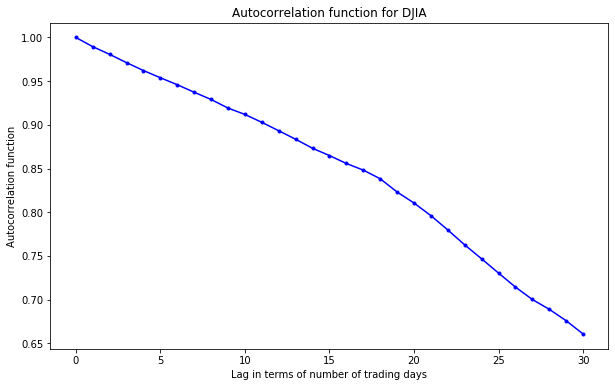

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')
plt.show()

* The preceding code, iterates over a list of 31 values of the lag starting from 0 to 30. A lag of
0 indicates autocorrelation of an observation with itself (in other words self-correlation) and
hence it is expected to be 1.0 as also confirmed in the following figure. Autocorrelation in
DJIA Close values appears to linearly drop with the lag with an apparent change in the rate
of the drop at around 18 days. At a lag of 30 days the ACF is a bit over 0.65.

* The ACF plot shows that autocorrelation, in the case of DJIA Close values, has a functional
dependency on the time lag between observations.

* We have written a for-loop to calculate the autocorrelation at different lags and plotted the
results. Alternatively, the plot_acf function of `statsmodels.graphics.tsaplots` to compute and plot the autocorrelation at various lags. Additionally, this function also plots the 95% confidence intervals. 

* Autocorrelation outside these confidence intervals is statistically significant correlation while those which
are inside the confidence intervals are due to random noise. The autocorrelation and confidence intervals generated by the plot_acf is shown in the following figure:

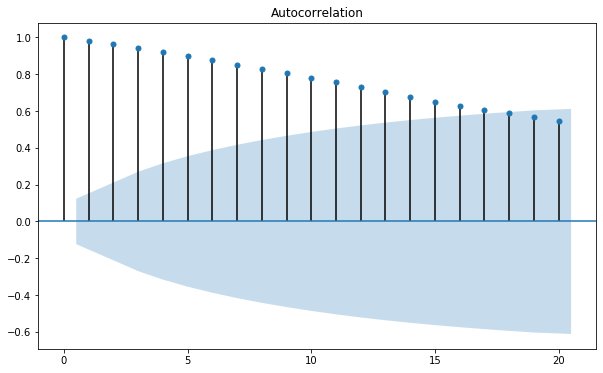

In [68]:
#Plot autocorrelation and confidence intervals using the plot_acf function
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    plot_acf(djia_df['Close'], lags=20)

* So far, we have discussed autocorrelation which is a measure of linear dependency between variables x_t and x_(t+h).
* `Autoregressive (AR)` models captures this dependency as a linear regression between the x_(t+h) and x_t. However, time series tend to carry information and dependency structures in steps and therefore autocorrelation at lag h is also influenced by the intermediate variables x_t, x_(t+1)…x_(t+h-1). Therefore, autocorrelation is not the correct measure of the mutual correlation between x_t and x_(t+h) in the presence of the intermediate variables. Hence, it would erroneous to choose h in AR models based on autocorrelation.
* Partial autocorrelation solves this problem by measuring the correlation between x_t and x_(t+h) when the influence of the intermediate variables has been removed.
* Hence partial autocorrelation in time series analysis defines the correlation between x_t and x_(t+h) which is not accounted for by lags t+1 to t+h-1.
* Partial autocorrelation helps in identifying the order h of an AR(h) model. Let us plot the partial autocorrelation of DJIA Close Values using plot_pacf as follows:

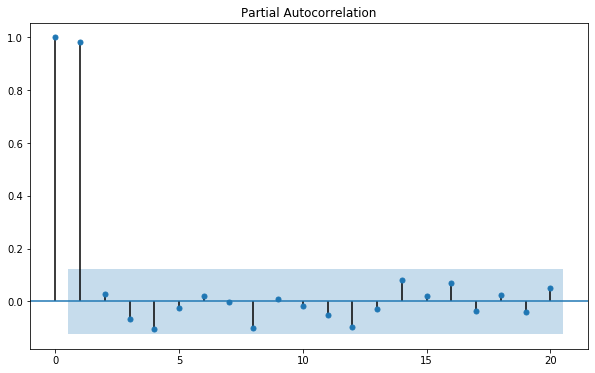

In [69]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    plot_pacf(djia_df['Close'], lags=20)

* The first partial autocorrelation at lag zero is always 1.0. As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. Hence, **for DJIA Close Values the order of AR models is one.**

Source: Practical Time Series Analysis - Dr. Avishek Pal, Dr. PKS Prakash